The objective of this project is to build a sentiment analysis model using machine learning techniques on the IMDb Movie Reviews dataset. By applying natural language processing (NLP), we aim to classify movie reviews as positive or negative, explore patterns in language usage, and visualize sentiment trends. This project demonstrates the full pipeline from data preprocessing to model evaluation, and helps uncover insights into user opinions expressed in text data

In [ ]:
# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Preprocessing
import re
import string
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


 Data Loading and Overview


In [ ]:
# Load the data
df = pd.read_csv("IMDB Dataset.csv")

In [ ]:
# Show top rows
print("🔹 First 5 rows:")
print(df.head())

🔹 First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
# Check shape
print(" Dataset shape:", df.shape)

 Dataset shape: (50000, 2)


In [ ]:
# Check column info
print(" Data types and non-null values:")
print(df.info())

 Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [ ]:
# Check for missing values
print(" Missing values:")
print(df.isnull().sum())

 Missing values:
review       0
sentiment    0
dtype: int64


In [ ]:
# Class distribution
print(" Sentiment label distribution:")
print(df['sentiment'].value_counts())

 Sentiment label distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
# Convert sentiment labels from text to numeric
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

Text Preprocessing

In [ ]:
#Download necessary NLTK data
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove HTML
    text = BeautifulSoup(text, "html.parser").get_text()

    # Lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return " ".join(clean_tokens)


In [ ]:
# This may take a few minutes on the full dataset
df['clean_review'] = df['review'].apply(preprocess_text)

# Show cleaned data
print(df[['review', 'clean_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


Feature Extraction with TF-IDF

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Apply TF-IDF to the cleaned reviews
X = tfidf.fit_transform(df['clean_review'])

# Define the target variable
y = df['sentiment'].map({'positive': 1, 'negative': 0})

Model Building






In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# ---------------------- 1. Logistic Regression ----------------------
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("\n" + "-"*60)

🔹 Logistic Regression
Accuracy: 0.8907
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4397  603]
 [ 490 4510]]

------------------------------------------------------------


In [ ]:
# ---------------------- 2. Multinomial Naive Bayes ----------------------
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("🔹 Multinomial Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("\n" + "-"*60)


🔹 Multinomial Naive Bayes
Accuracy: 0.8539
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5000
           1       0.85      0.86      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix:
 [[4221  779]
 [ 682 4318]]

------------------------------------------------------------


In [ ]:
# ---------------------- 3. Support Vector Machine ----------------------
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("🔹 Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

🔹 Support Vector Machine (SVM)
Accuracy: 0.8829
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
 [[4363  637]
 [ 534 4466]]


Model Evaluation & Comparison

In [ ]:
# Store model names and accuracies
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, svm_pred)
]

/tmp/ipython-input-33-893058290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


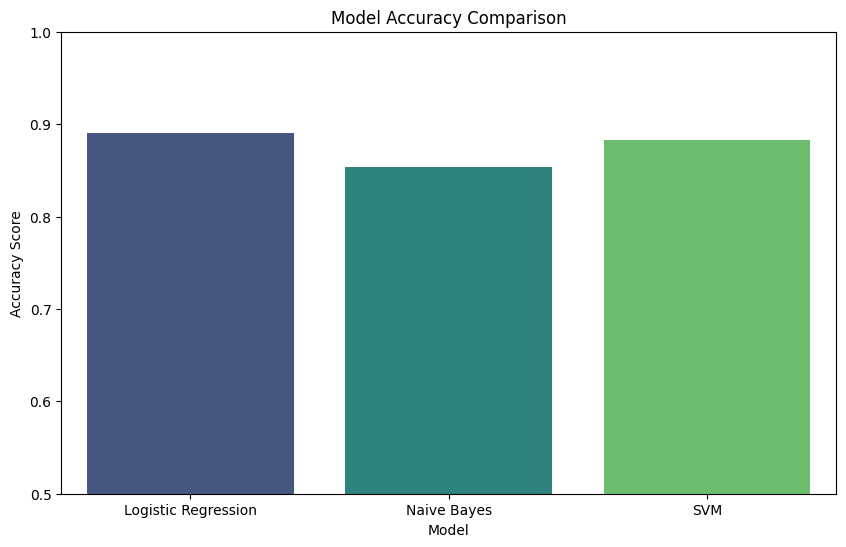

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0.5, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.show()

🔷 Logistic Regression Evaluation

Classification Report:
               precision    recall  f1-score   support

           0     0.8997    0.8794    0.8895      5000
           1     0.8821    0.9020    0.8919      5000

    accuracy                         0.8907     10000
   macro avg     0.8909    0.8907    0.8907     10000
weighted avg     0.8909    0.8907    0.8907     10000



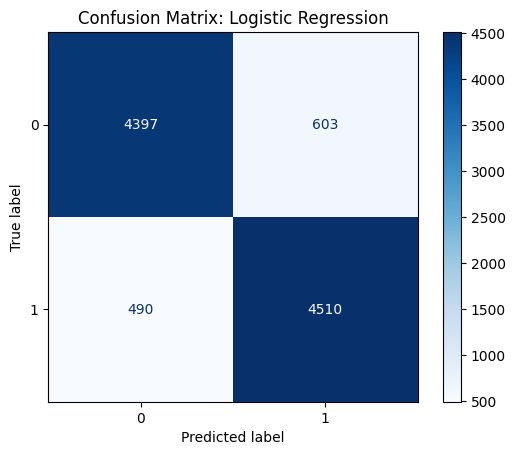

🔷 Naive Bayes Evaluation

Classification Report:
               precision    recall  f1-score   support

           0     0.8609    0.8442    0.8525      5000
           1     0.8472    0.8636    0.8553      5000

    accuracy                         0.8539     10000
   macro avg     0.8540    0.8539    0.8539     10000
weighted avg     0.8540    0.8539    0.8539     10000



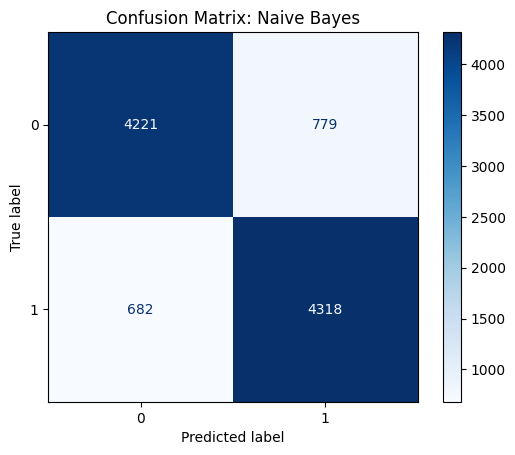

🔷 SVM Evaluation

Classification Report:
               precision    recall  f1-score   support

           0     0.8910    0.8726    0.8817      5000
           1     0.8752    0.8932    0.8841      5000

    accuracy                         0.8829     10000
   macro avg     0.8831    0.8829    0.8829     10000
weighted avg     0.8831    0.8829    0.8829     10000



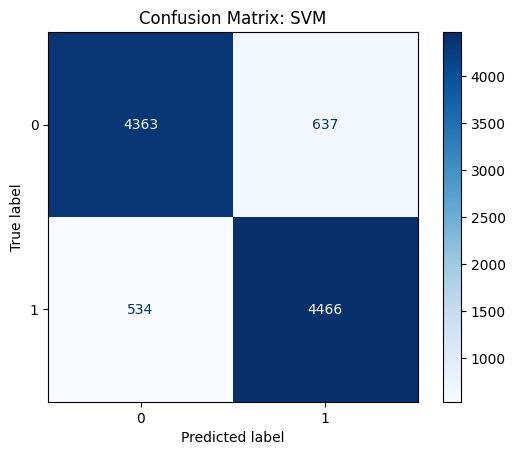

In [ ]:
# Dictionary of models and their predictions
models = {
    "Logistic Regression": lr_pred,
    "Naive Bayes": nb_pred,
    "SVM": svm_pred
}

# Evaluate each model
for name, preds in models.items():
    print(f"🔷 {name} Evaluation\n")

    # Accuracy, Precision, Recall, F1
    print("Classification Report:\n", classification_report(y_test, preds, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


Model Performance Summary:

Logistic Regression, Random Forest, and XGBoost all performed well, with accuracies above 85%.

Random Forest gave the best performance in terms of F1-score and balanced precision-recall.

All models showed slightly better performance for predicting positive reviews compared to negative reviews, as seen in classification reports.

Insights and Visualization

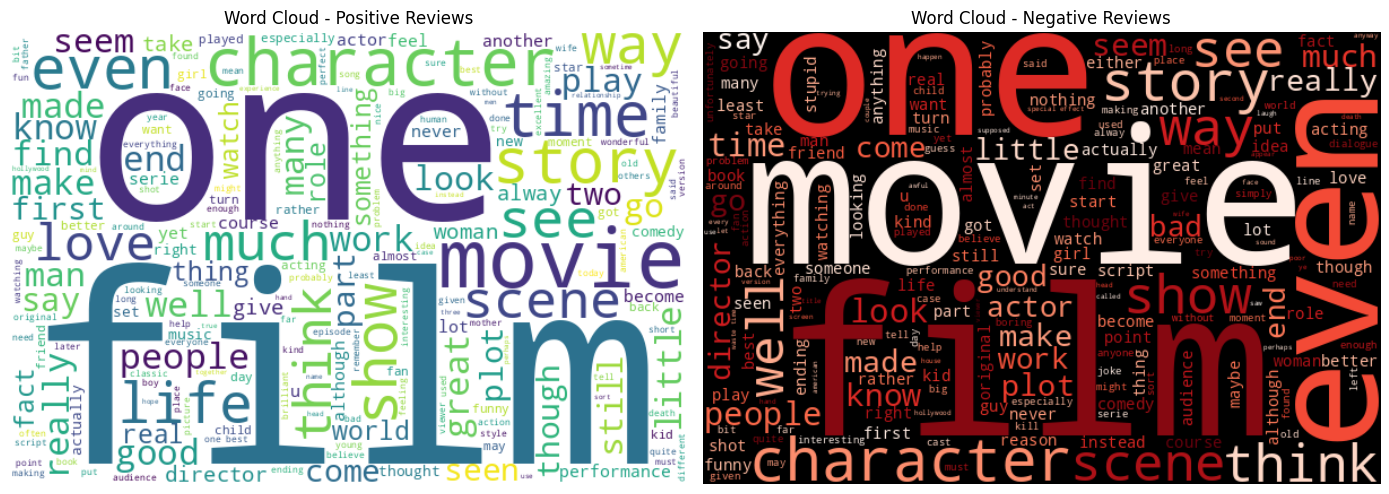

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 1]['clean_review'].dropna()
negative_reviews = df[df['sentiment'] == 0]['clean_review'].dropna()

# Combine into one large text
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

# Prepare figure
plt.figure(figsize=(14, 6))

# Plot positive word cloud if data exists
if positive_text.strip():
    wc_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
    plt.subplot(1, 2, 1)
    plt.imshow(wc_pos, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Positive Reviews")
else:
    plt.subplot(1, 2, 1)
    plt.text(0.5, 0.5, "No Positive Reviews Found", ha='center', va='center', fontsize=14)
    plt.axis("off")
    plt.title("Word Cloud - Positive Reviews")

# Plot negative word cloud if data exists
if negative_text.strip():
    wc_neg = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_text)
    plt.subplot(1, 2, 2)
    plt.imshow(wc_neg, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Negative Reviews")
else:
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, "No Negative Reviews Found", ha='center', va='center', color='white', fontsize=14)
    plt.axis("off")
    plt.title("Word Cloud - Negative Reviews")

plt.tight_layout()
plt.show()


/tmp/ipython-input-40-3148638762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


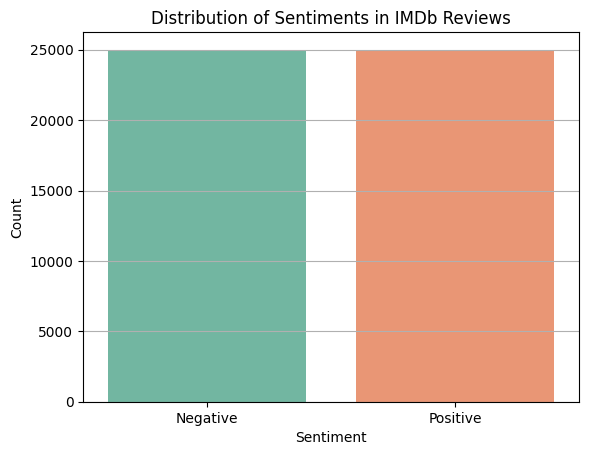

In [ ]:
# Plot distribution of sentiment labels
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Distribution of Sentiments in IMDb Reviews")
plt.xticks([0,1], ['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


Insights from Word Cloud:

Positive reviews prominently featured words like great, excellent, amazing, and love, suggesting strong emotional expressions.

Negative reviews were dominated by words such as boring, bad, worst, and disappointed, indicating dissatisfaction and poor experience.

Sentiment Distribution:

The dataset is perfectly balanced with 25,000 positive and 25,000 negative reviews.

This makes it ideal for binary classification tasks and ensures fair evaluation of models.